In [1]:
#import all the libraries
import pandas as pd
from sklearn.feature_selection import VarianceThreshold 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import date
from matplotlib import pyplot 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# DATA Preprocessing

In [2]:
# reading csv files
df=pd.read_csv(r'file:///D:/Games/data.csv');
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-05-20 00:00:00,2019.0,1.929287e+09,2019-05-09,20190509,20190509,20190524.0,USD,RV,1.0,NaN,30533.12,20190509.0,NAH4,1.929287e+09,0
1,U001,0200756072,REINHA corp,2019-12-04 00:00:00,2019.0,1.930130e+09,2019-11-13,20191108,20191113,20191203.0,USD,RV,1.0,NaN,76581.60,20191113.0,NAD1,1.930130e+09,0
2,U001,0200744019,TARG corp,2019-12-16 00:00:00,2019.0,1.930204e+09,2019-11-29,20191129,20191129,20191214.0,USD,RV,1.0,NaN,57832.90,20191129.0,NAA8,1.930204e+09,0
3,U001,200331749,SYSC corp,2019-07-16 00:00:00,2019.0,1.929565e+09,2019-07-01,20190701,20190701,20190716.0,USD,RV,1.0,NaN,9247.43,20190701.0,NAA8,1.929565e+09,0
4,U001,0200769623,WAL-MAR,2019-10-28 00:00:00,2019.0,1.930014e+09,2019-10-16,20191015,20191016,20191031.0,USD,RV,1.0,NaN,13296.28,20191016.0,NAH4,1.930014e+09,0


In [3]:
#Check for all duplicates sum
df.duplicated().sum()

1196

In [4]:

#Check for null
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [5]:
#Remove duplicates
#df1=df.drop_duplicates(keep='first', inplace=False )

In [6]:
#df=df1

In [7]:
#Reamining rows
df.shape

(50000, 19)

In [8]:
#converting dtypes to date_time objects
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['due_in_date']=pd.to_datetime(df.due_in_date,format='%Y%m%d')
df['posting_date']=pd.to_datetime(df['posting_date'], format='%Y %m %d')
df['baseline_create_date']=pd.to_datetime(df.baseline_create_date,format='%Y%m%d')
df['clear_date']= pd.to_datetime(df['clear_date'], format='%Y %m %d')
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [9]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-05-20,2019.0,1.929287e+09,2019-05-09,20190509,2019-05-09,2019-05-24,USD,RV,1.0,NaN,30533.12,2019-05-09,NAH4,1.929287e+09,0
1,U001,0200756072,REINHA corp,2019-12-04,2019.0,1.930130e+09,2019-11-13,20191108,2019-11-13,2019-12-03,USD,RV,1.0,NaN,76581.60,2019-11-13,NAD1,1.930130e+09,0
2,U001,0200744019,TARG corp,2019-12-16,2019.0,1.930204e+09,2019-11-29,20191129,2019-11-29,2019-12-14,USD,RV,1.0,NaN,57832.90,2019-11-29,NAA8,1.930204e+09,0
3,U001,200331749,SYSC corp,2019-07-16,2019.0,1.929565e+09,2019-07-01,20190701,2019-07-01,2019-07-16,USD,RV,1.0,NaN,9247.43,2019-07-01,NAA8,1.929565e+09,0
4,U001,0200769623,WAL-MAR,2019-10-28,2019.0,1.930014e+09,2019-10-16,20191015,2019-10-16,2019-10-31,USD,RV,1.0,NaN,13296.28,2019-10-16,NAH4,1.930014e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200762301,C&S WH trust,2019-08-27,2019.0,1.929732e+09,2019-08-11,20190810,2019-08-11,2019-08-26,USD,RV,1.0,NaN,3535.30,2019-08-11,NAC6,1.929732e+09,0
49996,U001,CCU013,KRAFT F corp,2019-03-01,2019.0,1.928663e+09,2019-01-24,20190122,2019-01-24,2019-01-24,USD,RV,1.0,NaN,6139.20,2019-01-24,NAX2,1.928663e+09,0
49997,U001,0200769623,WAL-MAR llc,2019-09-09,2019.0,1.929796e+09,2019-08-28,20190826,2019-08-28,2019-09-12,USD,RV,1.0,NaN,49055.04,2019-08-28,NAH4,1.929796e+09,0
49998,U001,0200148860,DOLLA,2019-12-05,2019.0,1.930165e+09,2019-11-20,20191118,2019-11-20,2019-12-05,USD,RV,1.0,NaN,15296.07,2019-11-20,NAA8,1.930165e+09,0


In [10]:
#constant column
df=df.drop(['doc_id','buisness_year','isOpen','area_business','posting_id','document type','invoice_id','document_create_date'],axis=1)

In [11]:
#Split DataSlicing out the records with Clearing date Null into a separate DataFrame and remaining into train
main_train = df[df.clear_date.isnull()==False]
main_test = df[df.clear_date.isnull()]

In [12]:
#find out Delay days
main_train['delay_days']=main_train['clear_date']-main_train['due_in_date']
main_train['delay_days']=main_train['delay_days']/np.timedelta64(1,'D')

In [13]:
#for duplicate value of main_test for merging in predict last part 
main_test1=df[df.clear_date.isnull()]

In [14]:
#No. of value
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
delay_days                       float64
dtype: object

In [15]:
#Removing clear date
main_train=main_train.drop(['clear_date'],axis=1)

In [16]:
#Check for null

main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
delay_days                0
dtype: int64

In [17]:
#Check for info
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 11 columns):
business_code             40000 non-null object
cust_number               40000 non-null object
name_customer             40000 non-null object
posting_date              40000 non-null datetime64[ns]
document_create_date.1    40000 non-null datetime64[ns]
due_in_date               40000 non-null datetime64[ns]
invoice_currency          40000 non-null object
total_open_amount         40000 non-null float64
baseline_create_date      40000 non-null datetime64[ns]
cust_payment_terms        40000 non-null object
delay_days                40000 non-null float64
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 3.7+ MB


In [18]:
#Check covarience
main_train.cov()

,total_open_amount,delay_days
total_open_amount,1.593828e+09,4252.425155
delay_days,4.252425e+03,120.963201


In [19]:
#Check unique in train
main_train.nunique()

business_code                 6
cust_number                1348
name_customer              3918
posting_date                424
document_create_date.1      426
due_in_date                 493
invoice_currency              2
total_open_amount         35581
baseline_create_date        431
cust_payment_terms           70
delay_days                  174
dtype: int64

In [20]:
# For catagorical columns with relatively low unique value (<= 12) -- looking for value_counts
# if unique count ==1 , constant column
for col in main_train.columns:
    if main_train[col].nunique()<= 12:
        print(main_train[col].value_counts())
        print('#########################')

U001    36110
CA02     3263
U013      512
U002      105
U005        9
U007        1
Name: business_code, dtype: int64
#########################
USD    36736
CAD     3264
Name: invoice_currency, dtype: int64
#########################


In [21]:
main_train.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
3791,U001,0200769623,WAL-MAR co,2018-12-30,2018-12-30,2019-01-14,USD,41846.32,2018-12-30,NAH4,-5.0
19781,U001,0200759878,SA llc,2018-12-30,2018-12-30,2019-01-14,USD,19048.38,2018-12-30,NAH4,3.0
3576,U001,0200799367,MCL,2018-12-30,2018-12-30,2019-01-14,USD,94904.14,2018-12-30,NAA8,4.0
39637,U001,0200769623,WAL-MAR corp,2018-12-30,2018-12-30,2019-01-14,USD,1897.44,2018-12-30,NAH4,-5.0
15315,U001,0200769623,WAL-MAR corporation,2018-12-30,2018-12-30,2019-01-14,USD,2646.29,2018-12-30,NAH4,-4.0
...,...,...,...,...,...,...,...,...,...,...,...
48405,U001,0200769623,WAL-MAR trust,2020-02-26,2020-02-26,2020-03-12,USD,10638.62,2020-02-26,NAH4,-3.0
7887,U001,0200793088,DEMOU foundation,2020-02-26,2020-02-26,2020-03-12,USD,49012.42,2020-02-26,NAA8,0.0
47961,U001,0200357714,US foundation,2020-02-27,2020-02-27,2020-03-13,USD,13783.54,2020-02-27,NAA8,0.0
46610,U001,0200413833,LDC systems,2020-02-27,2020-02-27,2020-03-13,USD,29832.09,2020-02-27,NAA8,7.0


# Split the data

In [22]:
#Remove target from X
X=main_train.drop(['delay_days'],axis=1)

In [23]:
#Contain only target value
y=main_train['delay_days']

In [24]:
X_train,X_inter_test,y_train,y_inter_test=train_test_split(X,y,test_size=0.25,random_state=5,shuffle=False)

In [25]:
X_val,X_test,y_val,y_test=train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0,shuffle=False)

In [26]:
X_train.shape,X_val.shape,X_test.shape

((30000, 10), (5000, 10), (5000, 10))

In [27]:
X_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

# EDA

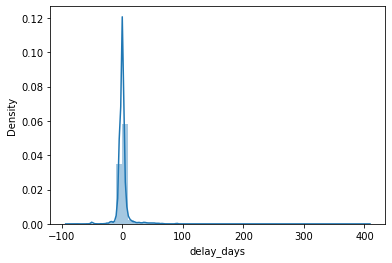

In [28]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

In [29]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,0,U001,0200769623,WAL-MAR systems,2019-05-09,2019-05-09,2019-05-24,USD,30533.12,2019-05-09,NAH4,-4.0
1,1,U001,0200756072,REINHA corp,2019-11-13,2019-11-13,2019-12-03,USD,76581.60,2019-11-13,NAD1,1.0
2,2,U001,0200744019,TARG corp,2019-11-29,2019-11-29,2019-12-14,USD,57832.90,2019-11-29,NAA8,2.0
3,3,U001,200331749,SYSC corp,2019-07-01,2019-07-01,2019-07-16,USD,9247.43,2019-07-01,NAA8,0.0
4,4,U001,0200769623,WAL-MAR,2019-10-16,2019-10-16,2019-10-31,USD,13296.28,2019-10-16,NAH4,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,37471,U001,0200769623,WAL-MAR corp,2019-11-02,2019-11-02,2019-11-17,USD,16512.99,2019-11-02,NAH4,2.0
29996,37472,CA02,0140105686,SYSC systems,2019-07-20,2019-07-20,2019-08-09,CAD,75613.73,2019-07-30,CA10,6.0
29997,37473,U001,0200712102,SUGAR corp,2019-08-24,2019-08-24,2019-10-23,USD,40218.00,2019-08-24,NAVQ,12.0
29998,37475,CA02,0140105686,SYSC systems,2019-09-13,2019-09-13,2019-09-30,CAD,77358.78,2019-09-20,CA10,3.0


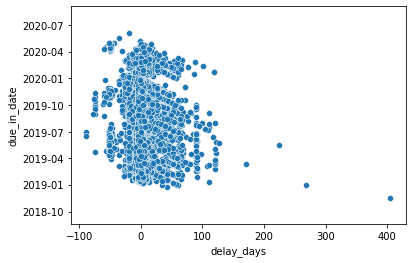

In [30]:
#for identify trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay_days", y="due_in_date")

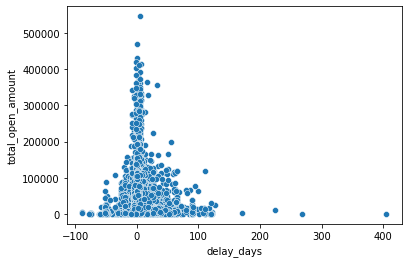

In [31]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay_days", y="total_open_amount")

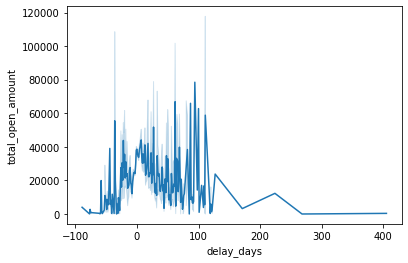

In [32]:
sns.lineplot(data=X_train.merge(y_train,on = X_train.index), x="delay_days", y="total_open_amount")

In [33]:
#group by min delay days
X_train.merge(y_train,on = X_train.index).groupby(['due_in_date','name_customer'])['delay_days'].agg(['min']).unstack().T.idxmin()

due_in_date
2018-11-17        (min, LOB associates)
2018-12-24               (min, VEG PR )
2018-12-30              (min, KRAFT F )
2018-12-31            (min, ARMY trust)
2019-01-01    (min, KRAFT F associates)
                        ...            
2020-04-29               (min, AM corp)
2020-04-30        (min, AM corporation)
2020-05-07                 (min, LAKE )
2020-05-19     (min, ZIYAD  foundation)
2020-06-06               (min, MASTER )
Length: 489, dtype: object

# feature eng


In [34]:
X_train.nunique()

business_code                 6
cust_number                1231
name_customer              3432
posting_date                424
document_create_date.1      425
due_in_date                 489
invoice_currency              2
total_open_amount         27134
baseline_create_date        427
cust_payment_terms           69
dtype: int64

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37476
Data columns (total 10 columns):
business_code             30000 non-null object
cust_number               30000 non-null object
name_customer             30000 non-null object
posting_date              30000 non-null datetime64[ns]
document_create_date.1    30000 non-null datetime64[ns]
due_in_date               30000 non-null datetime64[ns]
invoice_currency          30000 non-null object
total_open_amount         30000 non-null float64
baseline_create_date      30000 non-null datetime64[ns]
cust_payment_terms        30000 non-null object
dtypes: datetime64[ns](4), float64(1), object(5)
memory usage: 2.5+ MB


In [36]:
from sklearn.preprocessing import LabelEncoder


In [37]:
#Label encoding to convert object to int
label_encoder = LabelEncoder()
X_train['name_customer_enc']= label_encoder.fit_transform(X_train['name_customer'])

X_val['name_custome_enc']= label_encoder.fit_transform(X_val['name_customer'])
X_test['name_customer_enc']= label_encoder.fit_transform(X_test['name_customer'])

In [38]:
X_train['cust_number_enc']= label_encoder.fit_transform(X_train['cust_number'])

X_val['cust_number_enc']= label_encoder.fit_transform(X_val['cust_number'])
X_test['cust_number_enc']= label_encoder.fit_transform(X_test['cust_number'])

In [39]:
X_train['cust_payment_terms_enc']= label_encoder.fit_transform(X_train['cust_payment_terms'])

X_val['cust_payment_terms_enc']= label_encoder.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']= label_encoder.fit_transform(X_test['cust_payment_terms'])

In [40]:
X_train['invoice_currency_enc']= label_encoder.fit_transform(X_train['invoice_currency'])

X_val['invoice_currency _enc']= label_encoder.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency _enc']= label_encoder.fit_transform(X_test['invoice_currency'])

In [41]:
X_train['business_code_type']= label_encoder.fit_transform(X_train['business_code'])

X_val['business_code_type']= label_encoder.fit_transform(X_val['business_code'])
X_test['business_code_type']= label_encoder.fit_transform(X_test['business_code'])

In [42]:
X_test[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
43750,1387,WAL-MAR corporation
43751,1389,WAL-MAR in
43752,847,MEIJ in
43753,140,BJ'S systems
43754,1067,SA co
...,...,...
49995,209,C&S WH trust
49996,680,KRAFT F corp
49997,1390,WAL-MAR llc
49998,370,DOLLA


In [43]:

# function will delete a column from train , val and
def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [44]:
X_train ,X_val, X_test = thanos_snap(['name_customer'])

In [45]:
X_train ,X_val, X_test = thanos_snap(['cust_number'])

In [46]:
X_train ,X_val, X_test = thanos_snap(['cust_payment_terms'])

In [47]:
X_train ,X_val, X_test = thanos_snap(['invoice_currency'])

In [48]:
X_train ,X_val, X_test = thanos_snap(['business_code'])

In [49]:
#spliting Date month and year 
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_datey'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

In [50]:
X_train

,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,name_customer_enc,cust_number_enc,cust_payment_terms_enc,invoice_currency_enc,business_code_type,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date
0,2019-05-09,2019-05-09,2019-05-24,30533.12,2019-05-09,3335,771,33,1,1,24,5,2019
1,2019-11-13,2019-11-13,2019-12-03,76581.60,2019-11-13,2544,744,27,1,1,3,12,2019
2,2019-11-29,2019-11-29,2019-12-14,57832.90,2019-11-29,3082,719,19,1,1,14,12,2019
3,2019-07-01,2019-07-01,2019-07-16,9247.43,2019-07-01,2994,1036,19,1,1,16,7,2019
4,2019-10-16,2019-10-16,2019-10-31,13296.28,2019-10-16,3327,771,33,1,1,31,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37471,2019-11-02,2019-11-02,2019-11-17,16512.99,2019-11-02,3330,771,33,1,1,17,11,2019
37472,2019-07-20,2019-07-20,2019-08-09,75613.73,2019-07-30,2999,347,5,0,0,9,8,2019
37473,2019-08-24,2019-08-24,2019-10-23,40218.00,2019-08-24,2913,647,62,1,1,23,10,2019
37475,2019-09-13,2019-09-13,2019-09-30,77358.78,2019-09-20,2999,347,5,0,0,30,9,2019


In [51]:
#spliting Date month and year 

X_train['day_of_document_create_date.1'] = X_train['document_create_date.1'].dt.day
X_train['month_of_document_create_date.1'] = X_train['document_create_date.1'].dt.month
X_train['year_of_document_create_date.1'] = X_train['document_create_date.1'].dt.year

X_val['day_of_document_create_date.1'] = X_val['document_create_date.1'].dt.day
X_val['month_of_document_create_date.1'] = X_val['document_create_date.1'].dt.month
X_val['year_of_document_create_date.1'] = X_val['document_create_date.1'].dt.year


X_test['day_of_document_create_date.1'] = X_test['document_create_date.1'].dt.day
X_test['month_of_document_create_date.1'] = X_test['document_create_date.1'].dt.month
X_test['year_of_document_create_date.1'] = X_test['document_create_date.1'].dt.year

In [52]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

In [53]:
#spliting Date month and year 

X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month
X_train['year_of_posting_date'] = X_train['posting_date'].dt.year

X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month
X_val['year_of_posting_date'] = X_val['posting_date'].dt.year


X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month
X_test['year_of_posting_date'] = X_test['posting_date'].dt.year

In [54]:
X_train ,X_val, X_test = thanos_snap(['posting_date'])

In [55]:
X_train ,X_val, X_test = thanos_snap(['baseline_create_date'])

In [56]:
X_train ,X_val, X_test = thanos_snap(['document_create_date.1'])

In [57]:
X_train ,X_val, X_test = thanos_snap(['due_in_date'])

In [58]:
X_train


,total_open_amount,name_customer_enc,cust_number_enc,cust_payment_terms_enc,invoice_currency_enc,business_code_type,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date,day_of_document_create_date.1,month_of_document_create_date.1,year_of_document_create_date.1,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_posting_date,month_of_posting_date,year_of_posting_date
0,30533.12,3335,771,33,1,1,24,5,2019,9,5,2019,9,5,2019,9,5,2019
1,76581.60,2544,744,27,1,1,3,12,2019,13,11,2019,13,11,2019,13,11,2019
2,57832.90,3082,719,19,1,1,14,12,2019,29,11,2019,29,11,2019,29,11,2019
3,9247.43,2994,1036,19,1,1,16,7,2019,1,7,2019,1,7,2019,1,7,2019
4,13296.28,3327,771,33,1,1,31,10,2019,16,10,2019,16,10,2019,16,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37471,16512.99,3330,771,33,1,1,17,11,2019,2,11,2019,2,11,2019,2,11,2019
37472,75613.73,2999,347,5,0,0,9,8,2019,20,7,2019,30,7,2019,20,7,2019
37473,40218.00,2913,647,62,1,1,23,10,2019,24,8,2019,24,8,2019,24,8,2019
37475,77358.78,2999,347,5,0,0,30,9,2019,13,9,2019,20,9,2019,13,9,2019


# Feature Selection

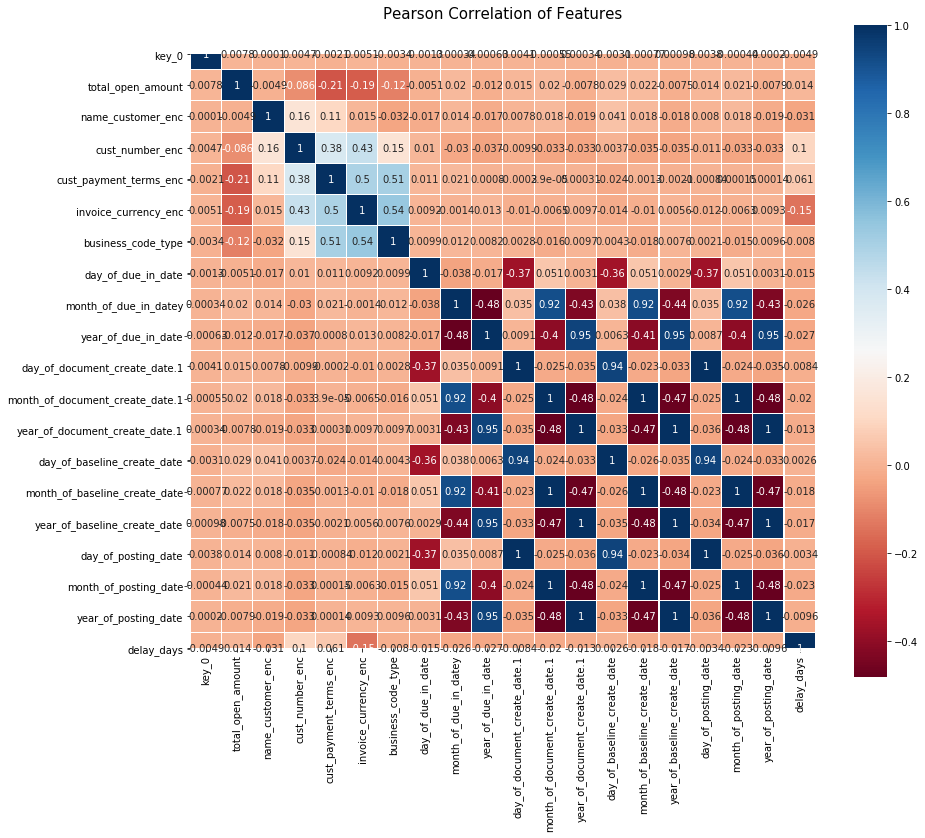

In [59]:

#Feature Selection

 
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [60]:
X_train.dtypes

total_open_amount                  float64
name_customer_enc                    int32
cust_number_enc                      int32
cust_payment_terms_enc               int32
invoice_currency_enc                 int32
business_code_type                   int32
day_of_due_in_date                   int64
month_of_due_in_datey                int64
year_of_due_in_date                  int64
day_of_document_create_date.1        int64
month_of_document_create_date.1      int64
year_of_document_create_date.1       int64
day_of_baseline_create_date          int64
month_of_baseline_create_date        int64
year_of_baseline_create_date         int64
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
dtype: object

In [61]:
#Check for Variance threshold 
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [62]:

sel.variances_

array([1.59439413e+09, 1.32465658e+06, 5.42036042e+04, 1.47271416e+02,
       7.56659156e-02, 2.93775249e-01, 7.58937649e+01, 1.19796796e+01,
       1.18649262e-01, 7.66322610e+01, 1.21575977e+01, 1.15624782e-01,
       7.81878269e+01, 1.21629834e+01, 1.15799946e-01, 7.66529404e+01,
       1.21567064e+01, 1.15583146e-01])

In [63]:
#Function for check null values
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())



In [64]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37476
Data columns (total 18 columns):
total_open_amount                  30000 non-null float64
name_customer_enc                  30000 non-null int32
cust_number_enc                    30000 non-null int32
cust_payment_terms_enc             30000 non-null int32
invoice_currency_enc               30000 non-null int32
business_code_type                 30000 non-null int32
day_of_due_in_date                 30000 non-null int64
month_of_due_in_datey              30000 non-null int64
year_of_due_in_date                30000 non-null int64
day_of_document_create_date.1      30000 non-null int64
month_of_document_create_date.1    30000 non-null int64
year_of_document_create_date.1     30000 non-null int64
day_of_baseline_create_date        30000 non-null int64
month_of_baseline_create_date      30000 non-null int64
year_of_baseline_create_date       30000 non-null int64
day_of_posting_date                30000 non-null

# model

# Linear Model

In [65]:
#Train the model
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [66]:
#Predict the delay day based on validation set
y_predict = base_model.predict(X_val)

In [67]:
from sklearn.metrics import mean_squared_error



In [68]:
#For rmse
mean_squared_error(y_val, y_predict, squared=False)

10.891182629598948

In [69]:
#For mse

mean_squared_error(y_val,y_predict)

118.61785907127785

In [70]:
#Compare data actual vs predict
met = pd.DataFrame(zip(y_predict , y_val),columns=['Predicted','Actuals'])

In [71]:
met

,Predicted,Actuals
0,0.270388,1.0
1,-8.993459,-19.0
2,0.131257,4.0
3,-3.521268,2.0
4,-3.372443,0.0
...,...,...
4995,-3.486098,0.0
4996,-2.298708,-5.0
4997,-2.599764,-7.0
4998,-2.945069,2.0


In [72]:
#Predict the delay day based on validation set
y_predict1 = base_model.predict(X_test)

In [73]:
#For rmse

mean_squared_error(y_test, y_predict1, squared=False)

10.137148069982356

In [74]:
#For mse

mean_squared_error(y_test, y_predict1)

102.76177099274702

In [75]:
#Compare data actual vs predict

met = pd.DataFrame(zip(y_predict1 , y_test),columns=['Predicted','Actuals'])

In [76]:
met

,Predicted,Actuals
0,-1.536398,-5.0
1,-1.780809,-5.0
2,-3.660996,1.0
3,-3.021052,0.0
4,-6.139589,1.0
...,...,...
4995,-2.283530,1.0
4996,8.029751,36.0
4997,-1.839183,-3.0
4998,-4.558771,0.0


In [77]:
from sklearn.metrics import accuracy_score


# DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=6)


In [79]:
#Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [80]:
#Predict the delay day based on validation set
y_predict2 = regressor.predict(X_val)

In [81]:
#For rmse
mean_squared_error(y_val, y_predict2, squared=False)

12.76383716836519

In [82]:
#For mse
mean_squared_error(y_val, y_predict2)

162.91553926054073

In [83]:
#Compare data actual vs predict

met = pd.DataFrame(zip(y_predict2 , y_val),columns=['Predicted','Actuals'])

In [84]:
met

,Predicted,Actuals
0,-40.070423,1.0
1,1.197055,-19.0
2,-40.070423,4.0
3,1.197055,2.0
4,1.197055,0.0
...,...,...
4995,1.197055,0.0
4996,-0.703953,-5.0
4997,1.197055,-7.0
4998,1.197055,2.0


In [85]:
#Predict the delay day based on validation set
y_predict_test5 = regressor.predict(X_test)
#for rmse
mean_squared_error(y_test, y_predict_test5, squared=False)

10.313275498268656

In [86]:
#For mse
mean_squared_error(y_test, y_predict_test5 )

106.36365150318858

In [87]:
#Compare data actual vs predict

met = pd.DataFrame(zip(y_predict_test5 , y_test),columns=['Predicted','Actuals'])

In [88]:
met

,Predicted,Actuals
0,-0.703953,-5.0
1,-0.703953,-5.0
2,1.197055,1.0
3,1.197055,0.0
4,-2.146169,1.0
...,...,...
4995,1.197055,1.0
4996,-2.146169,36.0
4997,-0.703953,-3.0
4998,1.197055,0.0


# XGB model

In [89]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [90]:
xgb=XGBRegressor(verbosity=0)

In [91]:
#Train the model
xgb.fit(X_train,y_train)
score=xgb.score(X_train,y_train)


In [92]:
print(score)

0.8061206883801089


In [93]:

cv=cross_val_score(xgb,X_train,y_train)
print(cv.mean())

0.5049441508834562


In [94]:
#Predict the delay day based on validation set
y_predict3=xgb.predict(X_val)
#for rmse
mean_squared_error(y_val, y_predict3, squared=False)


13.33111243286134

In [95]:
#For mse
mean_squared_error(y_val, y_predict3)

177.71855869759023

In [96]:
#acutal value
y_val

37477     1.0
37478   -19.0
37479     4.0
37480     2.0
37481     0.0
         ... 
43745     0.0
43746    -5.0
43747    -7.0
43748     2.0
43749    -1.0
Name: delay_days, Length: 5000, dtype: float64

In [97]:
#predict 
y_predict3

array([-7.7554145 , 17.791206  , -9.136829  , ..., -5.023383  ,
       -1.7922505 , -0.45103472], dtype=float32)

In [98]:
#Compare data actual vs predict

met = pd.DataFrame(zip(y_predict3 , y_val),columns=['Predicted','Actuals'])

In [99]:
#Actual vs predict
met

,Predicted,Actuals
0,-7.755414,1.0
1,17.791206,-19.0
2,-9.136829,4.0
3,-5.625280,2.0
4,-6.317170,0.0
...,...,...
4995,-8.310647,0.0
4996,-0.348132,-5.0
4997,-5.023383,-7.0
4998,-1.792251,2.0


# Random forest

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [101]:
y_pp=regr.predict(X_val)

In [102]:
y_pp

array([-0.94382799,  0.91545185, -0.94382799, ...,  0.91545185,
        0.91545185,  0.91545185])

In [103]:
met11 = pd.DataFrame(zip(y_predict3 , y_val),columns=['Predicted','Actuals'])

In [104]:
met11

,Predicted,Actuals
0,-7.755414,1.0
1,17.791206,-19.0
2,-9.136829,4.0
3,-5.625280,2.0
4,-6.317170,0.0
...,...,...
4995,-8.310647,0.0
4996,-0.348132,-5.0
4997,-5.023383,-7.0
4998,-1.792251,2.0


In [105]:
mean_squared_error(y_val, y_pp, squared=False)


10.999571995401084

In [106]:
mean_squared_error(y_val, y_pp)


120.99058408201176

# feature engineering

In [107]:
#predict the delay
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
posting_date                  0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
dtype: int64

In [108]:
X_main_test=main_test

In [109]:
X_main_test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

In [110]:
#encoding from object to float
label_encoder = LabelEncoder()

In [111]:
X_main_test['name_customer_enc']= label_encoder.fit_transform(main_test['name_customer'])
X_main_test['cust_number_enc']= label_encoder.fit_transform(X_main_test['cust_number'])
X_main_test['cust_payment_terms_enc']= label_encoder.fit_transform(X_main_test['cust_payment_terms'])
X_main_test['invoice_currency_enc']= label_encoder.fit_transform(X_main_test['invoice_currency'])
X_main_test['business_code_type']= label_encoder.fit_transform(X_main_test['business_code'])



In [112]:

X_main_test=X_main_test.drop(['cust_number','name_customer','cust_payment_terms','invoice_currency','business_code'],axis=1)


In [113]:
X_main_test

,clear_date,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,name_customer_enc,cust_number_enc,cust_payment_terms_enc,invoice_currency_enc,business_code_type
6,NaT,2020-04-28,2020-04-28,2020-05-13,28098.00,2020-04-28,1333,393,30,1,1
7,NaT,2020-03-14,2020-03-14,2020-03-29,5162.83,2020-03-14,814,395,15,1,1
10,NaT,2020-03-12,2020-03-12,2020-04-11,56686.89,2020-03-12,1164,252,27,1,1
11,NaT,2020-04-23,2020-04-23,2020-05-08,14907.74,2020-04-23,1579,374,15,1,1
16,NaT,2020-03-27,2020-03-27,2020-04-11,35709.50,2020-03-27,1713,415,30,1,1
...,...,...,...,...,...,...,...,...,...,...,...
49974,NaT,2020-03-01,2020-03-01,2020-03-16,934.30,2020-03-01,1712,415,30,1,1
49977,NaT,2020-03-01,2020-03-01,2020-03-16,15514.77,2020-03-01,657,398,15,1,1
49985,NaT,2020-04-15,2020-04-15,2020-04-30,34156.23,2020-04-15,357,472,17,1,1
49987,NaT,2020-03-04,2020-03-04,2020-03-19,35438.23,2020-03-04,28,361,15,1,1


In [114]:
#Spliting day month and year
X_main_test['day_of_due_in_date'] = X_main_test['due_in_date'].dt.day
X_main_test['month_of_due_in_datey'] = X_main_test['due_in_date'].dt.month
X_main_test['year_of_due_in_date'] = X_main_test['due_in_date'].dt.year

In [115]:
X_main_test['day_of_document_create_date.1'] = X_main_test['document_create_date.1'].dt.day
X_main_test['month_of_document_create_date.1'] = X_main_test['document_create_date.1'].dt.month
X_main_test['year_of_document_create_date.1'] = X_main_test['document_create_date.1'].dt.year


In [116]:
X_main_test['day_of_baseline_create_date'] = X_main_test['baseline_create_date'].dt.day
X_main_test['month_of_baseline_create_date'] = X_main_test['baseline_create_date'].dt.month
X_main_test['year_of_baseline_create_date'] = X_main_test['baseline_create_date'].dt.year


In [117]:
X_main_test['day_of_posting_date'] = X_main_test['posting_date'].dt.day
X_main_test['month_of_posting_date'] = X_main_test['posting_date'].dt.month
X_main_test['year_of_posting_date'] = X_main_test['posting_date'].dt.year


In [118]:
X_main_test=X_main_test.drop(['due_in_date','document_create_date.1','baseline_create_date','posting_date','clear_date'],axis=1)

In [119]:
X_main_test.dtypes

total_open_amount                  float64
name_customer_enc                    int32
cust_number_enc                      int32
cust_payment_terms_enc               int32
invoice_currency_enc                 int32
business_code_type                   int32
day_of_due_in_date                   int64
month_of_due_in_datey                int64
year_of_due_in_date                  int64
day_of_document_create_date.1        int64
month_of_document_create_date.1      int64
year_of_document_create_date.1       int64
day_of_baseline_create_date          int64
month_of_baseline_create_date        int64
year_of_baseline_create_date         int64
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
dtype: object

In [120]:
X_train.dtypes

total_open_amount                  float64
name_customer_enc                    int32
cust_number_enc                      int32
cust_payment_terms_enc               int32
invoice_currency_enc                 int32
business_code_type                   int32
day_of_due_in_date                   int64
month_of_due_in_datey                int64
year_of_due_in_date                  int64
day_of_document_create_date.1        int64
month_of_document_create_date.1      int64
year_of_document_create_date.1       int64
day_of_baseline_create_date          int64
month_of_baseline_create_date        int64
year_of_baseline_create_date         int64
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
dtype: object

#  Show down 

# Predication

In [121]:
#predict the model 
final_1=base_model.predict(X_main_test)

In [122]:

X_main_test

,total_open_amount,name_customer_enc,cust_number_enc,cust_payment_terms_enc,invoice_currency_enc,business_code_type,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date,day_of_document_create_date.1,month_of_document_create_date.1,year_of_document_create_date.1,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_posting_date,month_of_posting_date,year_of_posting_date
6,28098.00,1333,393,30,1,1,13,5,2020,28,4,2020,28,4,2020,28,4,2020
7,5162.83,814,395,15,1,1,29,3,2020,14,3,2020,14,3,2020,14,3,2020
10,56686.89,1164,252,27,1,1,11,4,2020,12,3,2020,12,3,2020,12,3,2020
11,14907.74,1579,374,15,1,1,8,5,2020,23,4,2020,23,4,2020,23,4,2020
16,35709.50,1713,415,30,1,1,11,4,2020,27,3,2020,27,3,2020,27,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49974,934.30,1712,415,30,1,1,16,3,2020,1,3,2020,1,3,2020,1,3,2020
49977,15514.77,657,398,15,1,1,16,3,2020,1,3,2020,1,3,2020,1,3,2020
49985,34156.23,357,472,17,1,1,30,4,2020,15,4,2020,15,4,2020,15,4,2020
49987,35438.23,28,361,15,1,1,19,3,2020,4,3,2020,4,3,2020,4,3,2020


In [123]:
#Put in the 1d array
final_1=pd.Series(final_1,name='delay_days')

In [124]:
final_1

0      -1.212754
1      -3.199732
2      -6.323750
3      -3.684282
4      -0.899249
          ...   
9995   -0.880600
9996   -2.550739
9997   -2.074019
9998   -2.501323
9999   -3.319759
Name: delay_days, Length: 10000, dtype: float64

In [125]:
#Round off of the float to int
final_1=final_1.round(0).astype(int)

In [126]:
#remove clear date 
main_test1=main_test1.drop(['clear_date'],axis=1)

In [127]:
main_test1

,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
6,U001,0200759878,SA in,2020-04-28,2020-04-28,2020-05-13,USD,28098.00,2020-04-28,NAH4
7,U001,0200760666,KEHE us,2020-03-14,2020-03-14,2020-03-29,USD,5162.83,2020-03-14,NAA8
10,U001,0200455322,PEA corporation,2020-03-12,2020-03-12,2020-04-11,USD,56686.89,2020-03-12,NAD5
11,U001,0200744019,TARG co,2020-04-23,2020-04-23,2020-05-08,USD,14907.74,2020-04-23,NAA8
16,U001,0200769623,WAL-MAR co,2020-03-27,2020-03-27,2020-04-11,USD,35709.50,2020-03-27,NAH4
...,...,...,...,...,...,...,...,...,...,...
49974,U001,0200769623,WAL-MAR associates,2020-03-01,2020-03-01,2020-03-16,USD,934.30,2020-03-01,NAH4
49977,U001,0200761734,H E BUT co,2020-03-01,2020-03-01,2020-03-16,USD,15514.77,2020-03-01,NAA8
49985,U001,0200794332,COST trust,2020-04-15,2020-04-15,2020-04-30,USD,34156.23,2020-04-15,NAAX
49987,U001,0200739006,AL foundation,2020-03-04,2020-03-04,2020-03-19,USD,35438.23,2020-03-04,NAA8


In [128]:
main_test.reset_index(drop=True,inplace=True)

In [129]:
#Merge the predict delay days in the data frame
Final = main_test1.merge(final_1, on =main_test1.index )


In [130]:
#final data frame
Final

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,6,U001,0200759878,SA in,2020-04-28,2020-04-28,2020-05-13,USD,28098.00,2020-04-28,NAH4,-1
1,7,U001,0200760666,KEHE us,2020-03-14,2020-03-14,2020-03-29,USD,5162.83,2020-03-14,NAA8,-3
2,10,U001,0200455322,PEA corporation,2020-03-12,2020-03-12,2020-04-11,USD,56686.89,2020-03-12,NAD5,-6
3,11,U001,0200744019,TARG co,2020-04-23,2020-04-23,2020-05-08,USD,14907.74,2020-04-23,NAA8,-4
4,16,U001,0200769623,WAL-MAR co,2020-03-27,2020-03-27,2020-04-11,USD,35709.50,2020-03-27,NAH4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49974,U001,0200769623,WAL-MAR associates,2020-03-01,2020-03-01,2020-03-16,USD,934.30,2020-03-01,NAH4,-1
9996,49977,U001,0200761734,H E BUT co,2020-03-01,2020-03-01,2020-03-16,USD,15514.77,2020-03-01,NAA8,-3
9997,49985,U001,0200794332,COST trust,2020-04-15,2020-04-15,2020-04-30,USD,34156.23,2020-04-15,NAAX,-2
9998,49987,U001,0200739006,AL foundation,2020-03-04,2020-03-04,2020-03-19,USD,35438.23,2020-03-04,NAA8,-3


In [131]:
#convert in to timedelta format
Final['delay_days']=Final['delay_days']*np.timedelta64(1,'D')

In [132]:
Final.shape

(10000, 12)

In [133]:
#Calculating predicted payment 
Final['predicted_payment_date']=Final['delay_days']+Final['due_in_date']


In [134]:
Final

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,predicted_payment_date
0,6,U001,0200759878,SA in,2020-04-28,2020-04-28,2020-05-13,USD,28098.00,2020-04-28,NAH4,-1 days,2020-05-12
1,7,U001,0200760666,KEHE us,2020-03-14,2020-03-14,2020-03-29,USD,5162.83,2020-03-14,NAA8,-3 days,2020-03-26
2,10,U001,0200455322,PEA corporation,2020-03-12,2020-03-12,2020-04-11,USD,56686.89,2020-03-12,NAD5,-6 days,2020-04-05
3,11,U001,0200744019,TARG co,2020-04-23,2020-04-23,2020-05-08,USD,14907.74,2020-04-23,NAA8,-4 days,2020-05-04
4,16,U001,0200769623,WAL-MAR co,2020-03-27,2020-03-27,2020-04-11,USD,35709.50,2020-03-27,NAH4,-1 days,2020-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49974,U001,0200769623,WAL-MAR associates,2020-03-01,2020-03-01,2020-03-16,USD,934.30,2020-03-01,NAH4,-1 days,2020-03-15
9996,49977,U001,0200761734,H E BUT co,2020-03-01,2020-03-01,2020-03-16,USD,15514.77,2020-03-01,NAA8,-3 days,2020-03-13
9997,49985,U001,0200794332,COST trust,2020-04-15,2020-04-15,2020-04-30,USD,34156.23,2020-04-15,NAAX,-2 days,2020-04-28
9998,49987,U001,0200739006,AL foundation,2020-03-04,2020-03-04,2020-03-19,USD,35438.23,2020-03-04,NAA8,-3 days,2020-03-16


In [135]:
Final

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,predicted_payment_date
0,6,U001,0200759878,SA in,2020-04-28,2020-04-28,2020-05-13,USD,28098.00,2020-04-28,NAH4,-1 days,2020-05-12
1,7,U001,0200760666,KEHE us,2020-03-14,2020-03-14,2020-03-29,USD,5162.83,2020-03-14,NAA8,-3 days,2020-03-26
2,10,U001,0200455322,PEA corporation,2020-03-12,2020-03-12,2020-04-11,USD,56686.89,2020-03-12,NAD5,-6 days,2020-04-05
3,11,U001,0200744019,TARG co,2020-04-23,2020-04-23,2020-05-08,USD,14907.74,2020-04-23,NAA8,-4 days,2020-05-04
4,16,U001,0200769623,WAL-MAR co,2020-03-27,2020-03-27,2020-04-11,USD,35709.50,2020-03-27,NAH4,-1 days,2020-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49974,U001,0200769623,WAL-MAR associates,2020-03-01,2020-03-01,2020-03-16,USD,934.30,2020-03-01,NAH4,-1 days,2020-03-15
9996,49977,U001,0200761734,H E BUT co,2020-03-01,2020-03-01,2020-03-16,USD,15514.77,2020-03-01,NAA8,-3 days,2020-03-13
9997,49985,U001,0200794332,COST trust,2020-04-15,2020-04-15,2020-04-30,USD,34156.23,2020-04-15,NAAX,-2 days,2020-04-28
9998,49987,U001,0200739006,AL foundation,2020-03-04,2020-03-04,2020-03-19,USD,35438.23,2020-03-04,NAA8,-3 days,2020-03-16


In [136]:
Final.dtypes

key_0                               int64
business_code                      object
cust_number                        object
name_customer                      object
posting_date               datetime64[ns]
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
total_open_amount                 float64
baseline_create_date       datetime64[ns]
cust_payment_terms                 object
delay_days                timedelta64[ns]
predicted_payment_date     datetime64[ns]
dtype: object

In [137]:
#sort the delay days in ascending order
Final.sort_values(by=['delay_days'],ascending=True)

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,predicted_payment_date
8698,43534,U001,0200540723,LAKE systems,2020-03-17,2020-03-17,2020-07-07,USD,41592.00,2020-03-17,90M7,-33 days,2020-06-04
2372,12016,U001,0200378310,NE,2020-03-10,2020-03-10,2020-06-08,USD,103061.95,2020-03-10,NAVM,-21 days,2020-05-18
5798,28875,U001,0100033394,MONOGR corp,2020-03-14,2020-03-14,2020-05-09,USD,21940.80,2020-03-14,BR56,-19 days,2020-04-20
6241,31136,U001,0100031704,DELHAIZE foundation,2020-04-23,2020-04-23,2020-06-27,USD,6041.96,2020-04-23,NAGD,-18 days,2020-06-09
7414,37062,U001,0100029677,MASSIMO co,2020-03-05,2020-03-05,2020-05-04,USD,49885.25,2020-03-05,NA8Q,-18 days,2020-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,381,U001,0200230690,DECA in,2020-04-21,2020-04-21,2020-03-23,USD,6220.25,2020-03-16,NAM1,13 days,2020-04-05
2384,12091,CA02,0140106408,WAL-M associates,2020-04-06,2020-04-06,2020-04-06,CAD,3273.64,2020-03-27,CA10,15 days,2020-04-21
5692,28378,CA02,0140106408,WAL-M foundation,2020-04-06,2020-04-06,2020-04-02,CAD,16368.18,2020-03-23,CA10,16 days,2020-04-18
6521,32591,U001,0200754118,ARMY associates,2020-04-24,2020-04-24,2020-01-31,USD,110.31,2020-01-16,NAM3,38 days,2020-03-09


In [138]:
Final3=Final

In [139]:
#Converting into integer
Final3['delay_days'] = Final3['delay_days'].dt.days.astype('int16')

In [140]:
# adding delay_bucket 
bins = [-45,-30,-15,0, 15, 30, 45, 60 ,70 ,80]
Final3['delay_buckets'] = pd.cut(Final3['delay_days'],bins)


In [141]:
Final3

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,predicted_payment_date,delay_buckets
0,6,U001,0200759878,SA in,2020-04-28,2020-04-28,2020-05-13,USD,28098.00,2020-04-28,NAH4,-1,2020-05-12,"(-15, 0]"
1,7,U001,0200760666,KEHE us,2020-03-14,2020-03-14,2020-03-29,USD,5162.83,2020-03-14,NAA8,-3,2020-03-26,"(-15, 0]"
2,10,U001,0200455322,PEA corporation,2020-03-12,2020-03-12,2020-04-11,USD,56686.89,2020-03-12,NAD5,-6,2020-04-05,"(-15, 0]"
3,11,U001,0200744019,TARG co,2020-04-23,2020-04-23,2020-05-08,USD,14907.74,2020-04-23,NAA8,-4,2020-05-04,"(-15, 0]"
4,16,U001,0200769623,WAL-MAR co,2020-03-27,2020-03-27,2020-04-11,USD,35709.50,2020-03-27,NAH4,-1,2020-04-10,"(-15, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49974,U001,0200769623,WAL-MAR associates,2020-03-01,2020-03-01,2020-03-16,USD,934.30,2020-03-01,NAH4,-1,2020-03-15,"(-15, 0]"
9996,49977,U001,0200761734,H E BUT co,2020-03-01,2020-03-01,2020-03-16,USD,15514.77,2020-03-01,NAA8,-3,2020-03-13,"(-15, 0]"
9997,49985,U001,0200794332,COST trust,2020-04-15,2020-04-15,2020-04-30,USD,34156.23,2020-04-15,NAAX,-2,2020-04-28,"(-15, 0]"
9998,49987,U001,0200739006,AL foundation,2020-03-04,2020-03-04,2020-03-19,USD,35438.23,2020-03-04,NAA8,-3,2020-03-16,"(-15, 0]"


In [142]:
#sort with delay days in descending order 
Final3.sort_values(by=['delay_days'],ascending=False)

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,predicted_payment_date,delay_buckets
7055,35260,CA02,0100047806,FRUITION foundation,2020-04-14,2020-04-14,2019-12-10,CAD,20875.75,2019-11-30,CA10,73,2020-02-21,"(70, 80]"
6521,32591,U001,0200754118,ARMY associates,2020-04-24,2020-04-24,2020-01-31,USD,110.31,2020-01-16,NAM3,38,2020-03-09,"(30, 45]"
5692,28378,CA02,0140106408,WAL-M foundation,2020-04-06,2020-04-06,2020-04-02,CAD,16368.18,2020-03-23,CA10,16,2020-04-18,"(15, 30]"
2384,12091,CA02,0140106408,WAL-M associates,2020-04-06,2020-04-06,2020-04-06,CAD,3273.64,2020-03-27,CA10,15,2020-04-21,"(0, 15]"
2973,15069,U001,0200754118,ARMY corp,2020-05-06,2020-05-06,2020-04-16,USD,70.00,2020-04-01,NAM3,13,2020-04-29,"(0, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7414,37062,U001,0100029677,MASSIMO co,2020-03-05,2020-03-05,2020-05-04,USD,49885.25,2020-03-05,NA8Q,-18,2020-04-16,"(-30, -15]"
6241,31136,U001,0100031704,DELHAIZE foundation,2020-04-23,2020-04-23,2020-06-27,USD,6041.96,2020-04-23,NAGD,-18,2020-06-09,"(-30, -15]"
5798,28875,U001,0100033394,MONOGR corp,2020-03-14,2020-03-14,2020-05-09,USD,21940.80,2020-03-14,BR56,-19,2020-04-20,"(-30, -15]"
2372,12016,U001,0200378310,NE,2020-03-10,2020-03-10,2020-06-08,USD,103061.95,2020-03-10,NAVM,-21,2020-05-18,"(-30, -15]"
